In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Here we will use 3 algorithms:
1. KNN
2. Decision Tree Classifier
3. Random Forest Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
df = pd.read_csv('heart.csv')

In [44]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [45]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


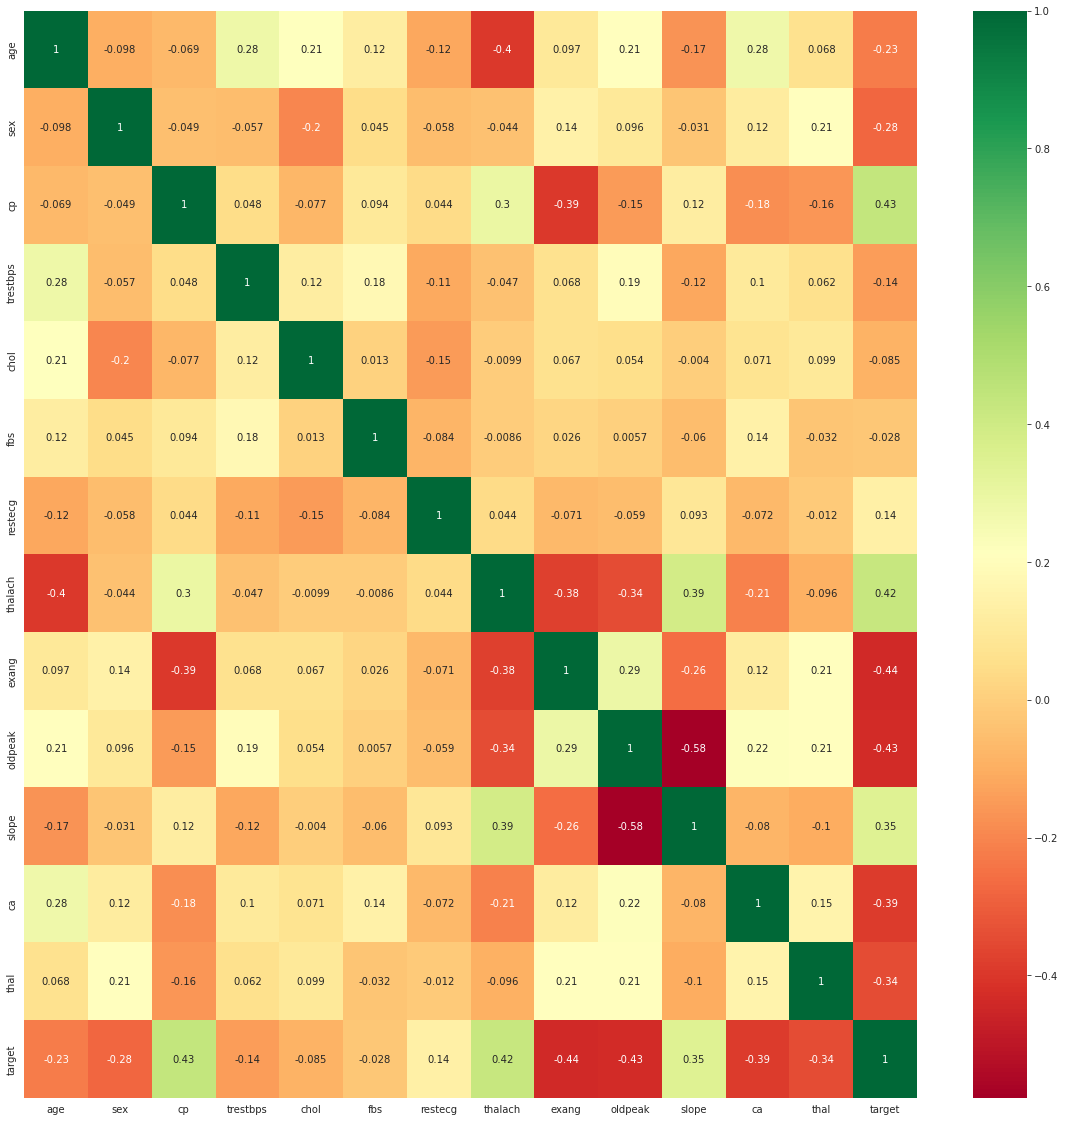

In [47]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

g=sns.heatmap(df[top_corr_features].corr(), annot= True, cmap="RdYlGn")

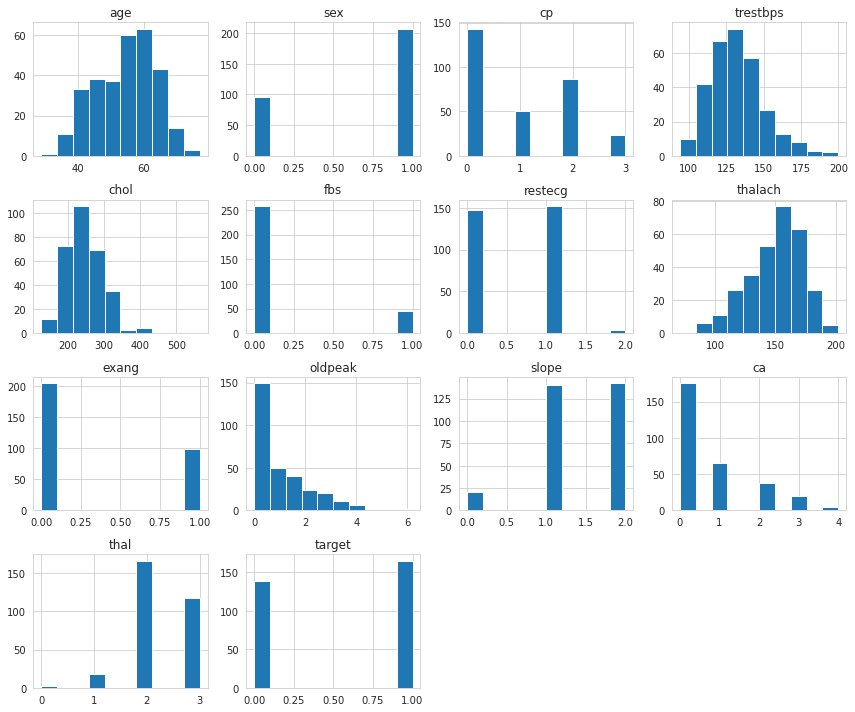

In [48]:
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='target', ylabel='count'>

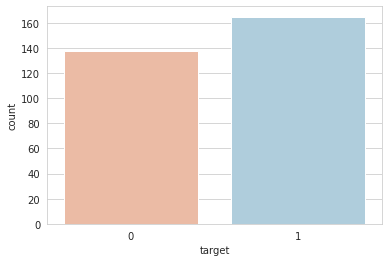

In [52]:
sns.set_style('whitegrid')
sns.countplot(x= 'target', data=df, palette='RdBu')

# Data Processing

In [53]:
dataset = pd.get_dummies(df, columns=['sex','cp','fbs','restecg','exang','slope','ca','thal'])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
column_to_scale = ['age','trestbps','chol','thalach','oldpeak']
dataset[column_to_scale]= standardScaler.fit_transform(dataset[column_to_scale])

In [55]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [56]:
Y= dataset['target']
X= dataset.drop(['target'],axis=1)

In [61]:
X

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [108]:
from sklearn.model_selection import cross_val_score
knn_scores =[]
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    score= cross_val_score(knn_classifier, X,Y,cv=10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors classifier Score for diferent K values')

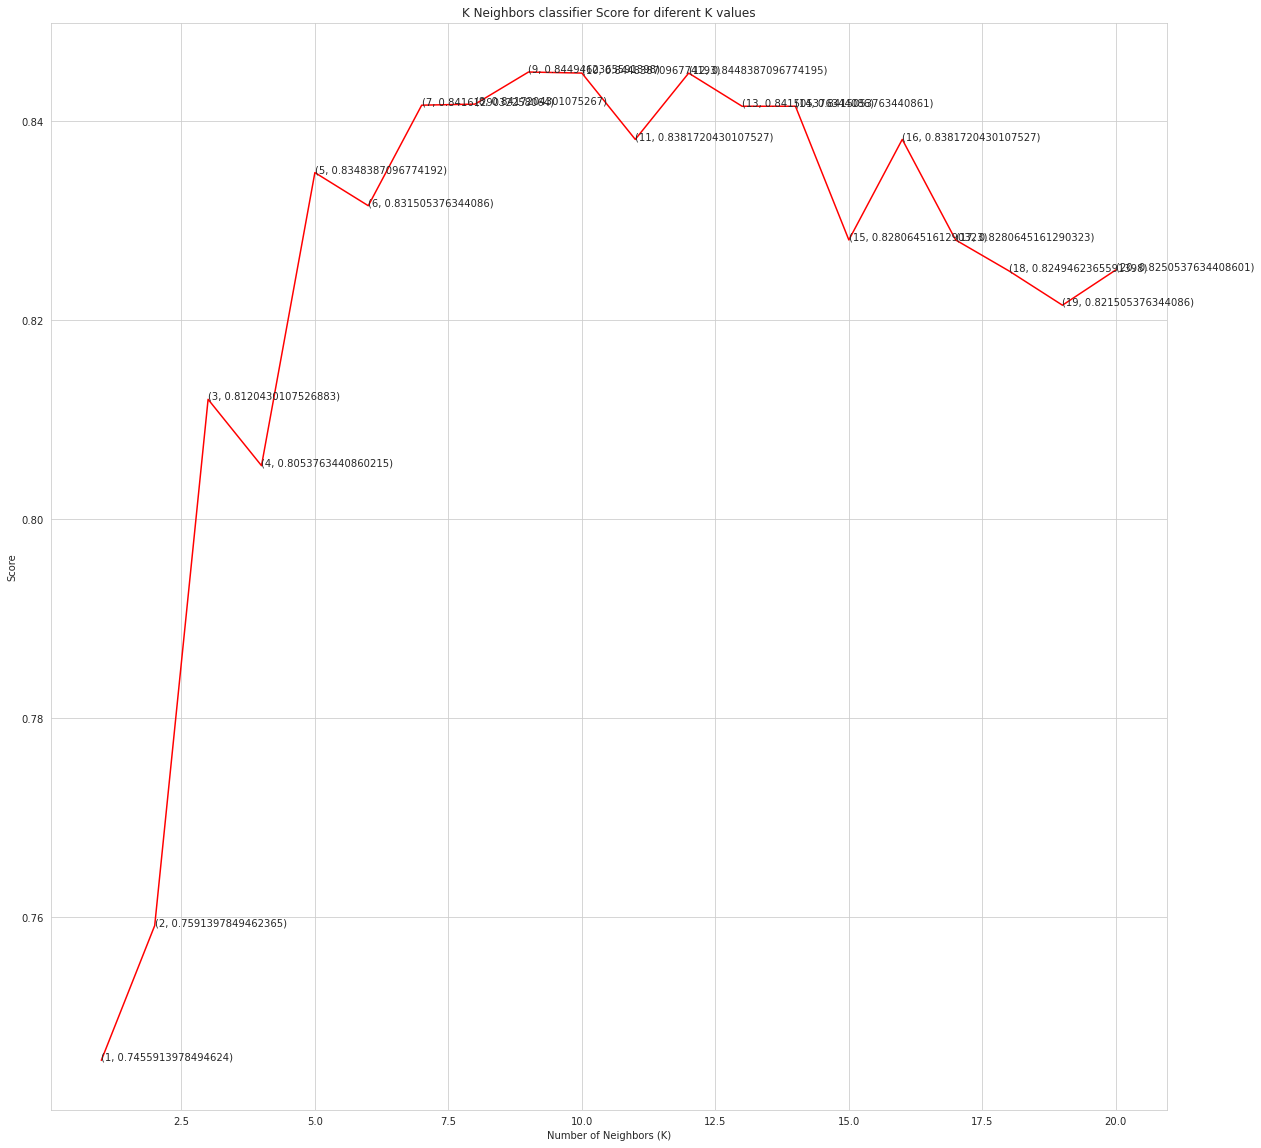

In [109]:
plt.figure(figsize=(20,20))
plt.plot([k for k in range(1,21)], knn_scores, color= 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Score")
plt.title("K Neighbors classifier Score for diferent K values")

In [110]:
knn_scores

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

# Random Forest Classifier

In [103]:
cv=20
ran_classifier = RandomForestClassifier(n_estimators=cv)
rf_scores = cross_val_score(ran_classifier, X,Y, cv=cv)

In [104]:
rf_scores

array([0.875     , 0.8125    , 0.75      , 0.8       , 0.86666667,
       0.93333333, 0.93333333, 0.93333333, 0.8       , 0.86666667,
       0.86666667, 0.86666667, 0.8       , 0.8       , 0.73333333,
       0.93333333, 0.73333333, 0.66666667, 0.73333333, 0.8       ])

In [105]:
rf_scores.mean()

0.8252083333333331

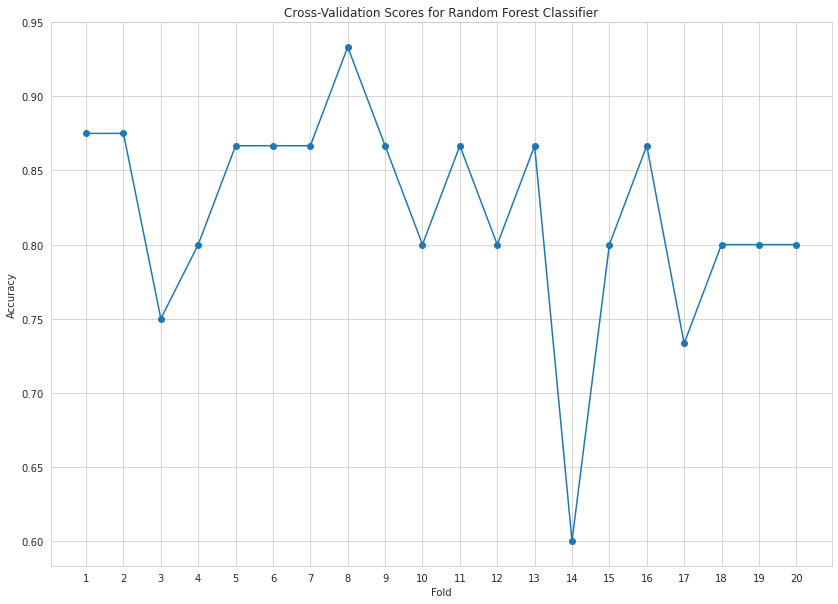

In [106]:
plt.figure(figsize=(14, 10))
plt.plot(range(1, cv+1), ran_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Random Forest Classifier')
plt.xticks(range(1, cv+1))
plt.grid(True)
plt.show()

# Decision Tree Classifier


In [100]:
decision_tree_classifier = DecisionTreeClassifier()

cv_folds = 15
dt_scores = cross_val_score(decision_tree_classifier, X,Y,cv= cv_folds)

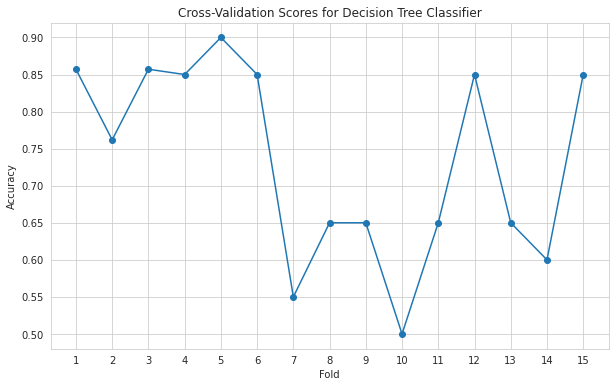

In [101]:
# Plotting the cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, cv_folds + 1), dt_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores for Decision Tree Classifier')
plt.xticks(range(1, cv_folds + 1))
plt.grid(True)
plt.show()

In [112]:
dt_scores

array([0.85714286, 0.76190476, 0.85714286, 0.85      , 0.9       ,
       0.85      , 0.55      , 0.65      , 0.65      , 0.5       ,
       0.65      , 0.85      , 0.65      , 0.6       , 0.85      ])

In [113]:
# Calculate mean scores
dt_mean_score = dt_scores.mean()
rf_mean_score = rf_scores.mean()
knn_mean_score = np.mean(knn_score)

In [114]:
# Create a DataFrame to display the results
data = {'Algorithm': ['Decision Tree', 'Random Forest', 'KNN'],
        'Mean Score': [dt_mean_score, rf_mean_score, knn_mean_score]}

scores_df = pd.DataFrame(data)

print(scores_df)

       Algorithm  Mean Score
0  Decision Tree    0.735079
1  Random Forest    0.825208
2            KNN    0.824672
